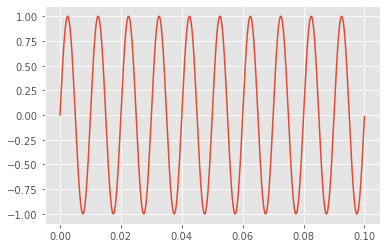

In [ ]:
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)

plt.plot(t_vec,y)
plt.show()



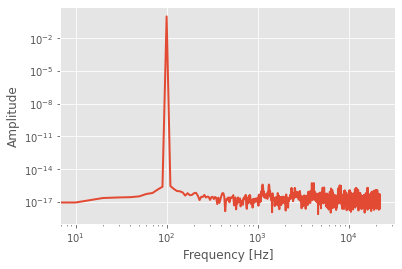

In [ ]:
# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform

In [1]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2

plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")

plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")

plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")


plt.tight_layout()
plt.show()



NameError: ignored

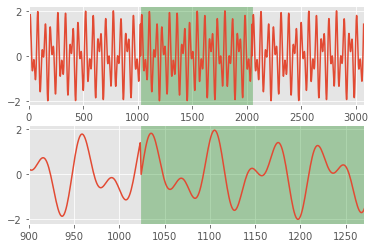

In [ ]:
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


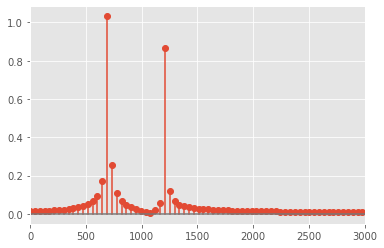

In [ ]:
from scipy.fftpack import fft

yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

https://datascienceschool.net/view-notebook/691326b7f88644f79ec7ddc9f27f84ec/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This signific

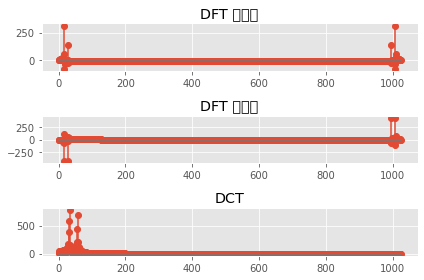

In [ ]:
from scipy.fftpack import dct

dct_type = 2
yf2 = dct(y, dct_type, N)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT 실수부")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT 허수부")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()